# Построение графиков и визуализация данных

Существует огромное количество разнообразных библиотек для построения графиков и визуализации данных в `python`. Ниже будут разобраны преимущества и недостатки 3 самых необходимых библиотек по мнению автора курса, а также будет приведен неисчерпывающий список альтернатив. В разделе про каждую библиотеку будет приведен пример кода, чтобы оценить необходимое количество усилий, чтобы построить необходимый график.

## `Matplotlib`

[Matplotlib](https://matplotlib.org/) --- основная библиотека для построения графиков в `python`, которая позволяет строить графики почти любого вида. 

Самое главное преимущество этой библиотеки --- гибкость: в ней можно настроить, если не всё, то почти всё. Отсюда же проистекает один из недостатков: почти всё и приходиться настраивать. Построенный в минимальном варианте график нередко выглядит сыро, из-за чего требуется написать немало кода, чтобы добавить на график все необходимые элементы таким образом, чтобы это всё выглядело приятно глазу.  

Тем не менее знание этой библиотеки для ученого --- `must have`. После освоения её на среднем уровне, можно быстро строить необходимые графики и приводить их к надлежащему виду, например, для публикации в научной статье или для иллюстрации доклада на конференции. Именно ей и будет уделено основное внимание в курсе. 

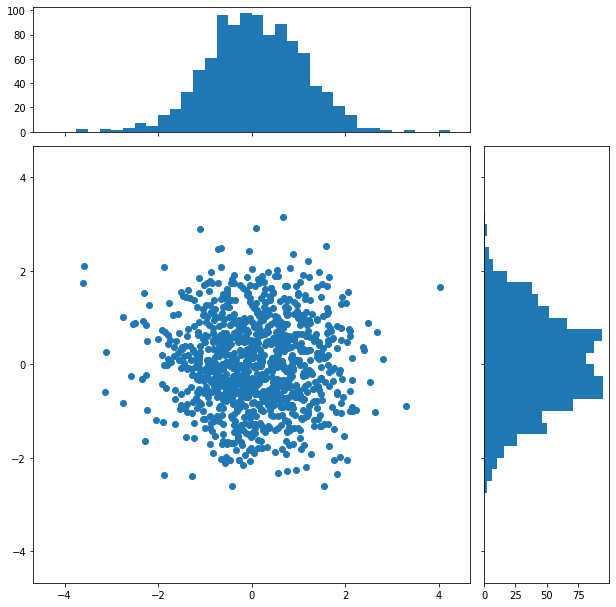

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


# start with a square Figure
fig = plt.figure(figsize=(10, 10))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

## `seaborn`

[Seaborn](https://seaborn.pydata.org/) --- библиотека для построенная графиков, нацеленная прежде всего на задачи статистики, анализа данных, машинного обучения и прочего. В связи с этим в ней из коробки доступно много методов для построения распространенных в мире статистики видов графиков. Удобство этой библиотеки в полной мере раскрывается в совокупности с таблицами библиотеки [pandas](https://pandas.pydata.org/), которая будет обсуждаться позднее в рамках курса. В комбинации с `pandas` графики `seaborn` обычно строятся в пару строк и при этом нередко сразу же выглядят неплохо.  

Но даже если построенный график все ещё не удовлетворяет требованиям, то в силу вступает ещё одно преимущество этой библиотеки: она является надстройкой над `Matplotlib`, а значит построенные ей графики можно доводить до ума средствами библиотеки `Matplotlib`.

Из недостатков для среднестатистического ученого физика можно отметить, что они не являются основной целевой аудиторией разработчиков библиотеки `seaborn`, а значит не всегда в `seaborn` найдутся методы для построения необходимых графиков. 

```{note}
Так же достойны упоминания [vega/altair](https://altair-viz.github.io/).
```

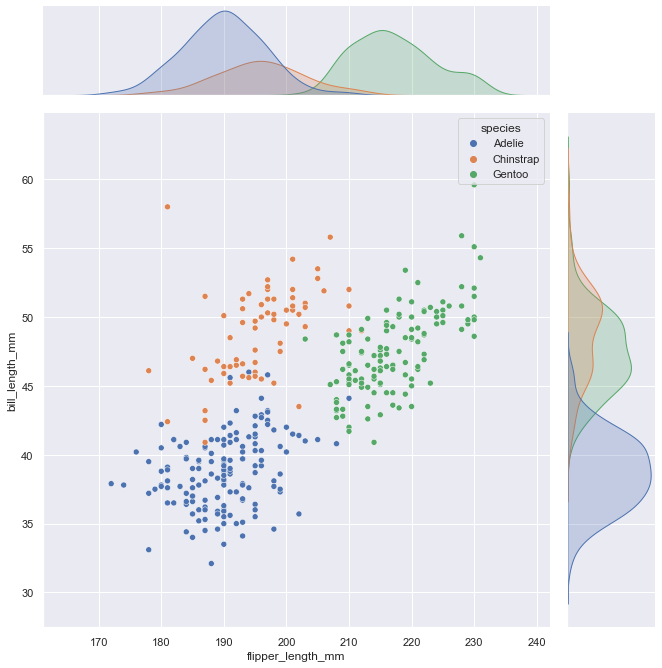

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.set_theme(style="darkgrid")

# Load an example dataset
penguins = sns.load_dataset("penguins")

# Plot the responses for different events and regions
g = sns.jointplot(
    data=penguins, 
    x="flipper_length_mm", 
    y="bill_length_mm", 
    hue="species",
    )

g.figure.set_size_inches((10, 10))

## `Plotly`

[Plotly](https://plotly.com/python/) --- лучшая из известных автору библиотека для построения **интерактивных** графиков. Как и `seaborn`, `Plotly` дружит с таблицами `pandas` и построенные с помощью `Plotly` графики часто выглядят достаточно хорошо их коробки, но `Plotly` не основан на `Matplotlib` и для тонкой настройки его графиков необходимо специально изучать его принципы работы. Интерактивность этой библиотеки очень пригождается в задачах анализа данных.  

`Plotly` изначально заточена для отображения графиков в браузере и для встраивания их на интернет страницы, но может успешно использоваться и в блокнотах `jupyter`.

In [3]:
import plotly.express as px

fig = px.scatter(
    penguins, 
    x="flipper_length_mm", 
    y="bill_length_mm", 
    color="species", 
    marginal_x="histogram", 
    marginal_y="histogram"
)
fig

## `Altair`

[Altair](https://altair-viz.github.io/) --- нацеленная на статистику и анализ данных библиотека. По целевой аудитории конкурент `seaborn`, но отличается декларативным стилем построения графиков, что обеспечивает ей свою нишу. Автор курса с ней практически не знаком, но упоминает её здесь на всякий случай.

In [4]:
import altair as alt

alt.Chart(penguins).mark_circle(size=60).encode(
    x="flipper_length_mm", 
    y="bill_length_mm", 
    color="species", 
).interactive()

alt.Chart(...)

## `Bokeh`

[Bokeh](https://docs.bokeh.org/en/latest/) --- ещё одна библиотека для построения интерактивных графиков, с которой автор практически не знаком, но упоминает её здесь на всякий случай.

In [6]:
from bokeh.plotting import figure, show
from bokeh.sampledata.penguins import data
from bokeh.transform import factor_cmap, factor_mark
from bokeh.io import output_notebook

SPECIES = sorted(data.species.unique())
MARKERS = ['hex', 'circle_x', 'triangle']

p = figure(title = "Penguin size", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Flipper Length (mm)'
p.yaxis.axis_label = 'Bill Length (mm)'

p.scatter("flipper_length_mm", "bill_length_mm", source=data,
          legend_group="species", fill_alpha=0.4, size=12,
          marker=factor_mark('species', MARKERS, SPECIES),
          color=factor_cmap('species', 'Category10_3', SPECIES))

p.legend.location = "top_left"
p.legend.title = "Species"

output_notebook() # необходимо, для вывода графика в ноутбуке, а не в браузере
show(p)

Loading BokehJS ...

## `Mayavi`

[Mayavi](https://docs.enthought.com/mayavi/mayavi/) предназначена для визуализации научных данных, а не заточена под статистику и анализ данных, в отличие от нескольких предыдущих графических библиотек. Автор курса с ней не знаком, но приводит её здесь на всякий случай.

## `PyQtGraph`

[PyQtGraph](https://pyqtgraph.readthedocs.io/en/latest/introduction.html) --- библиотека для построения графиков с графическим пользовательским интерфейсом. Автор курса с ней не знаком, но приводит её здесь на всякий случай.